# Library

In [1]:
from library import *


2023-02-27 14:30:04.235155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 14:30:04.413002: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-27 14:30:04.413049: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-27 14:30:04.454985: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-27 14:30:06.693309: W tensorflow/stream_executor/pla

# Data importation

In [2]:
data = pd.read_csv("Datasets/data.csv", sep=";")
data

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age
0,2,6,7,3,8,4,-1,-1,0,57
1,6,5,3,6,1,2,-1,-1,0,57
2,6,3,3,8,1,3,-1,-1,0,57
3,7,6,10,3,0,9,-1,-1,0,57
4,3,5,8,6,5,7,-1,-1,0,57
...,...,...,...,...,...,...,...,...,...,...
8959,6,1,11,1,5,8,7,8,1,21
8960,5,2,14,11,7,5,6,7,1,21
8961,6,1,11,1,6,2,9,5,1,21
8962,1,4,1,11,5,7,3,2,1,21


# Set train and test dataset

In [3]:
#set feature_names
feature_names = ["left_char","right_char","strength_left","strength_right","scenario","value_left_rep1","value_left_rep2","age","sex"]

In [4]:
#get X and Y
X = data[feature_names]
Y = data.value_left

In [5]:
#split in train & test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Neural Network

## Model train

In [6]:
#we create the model, 3 dense layers + 3 dropout
def create_model(optimizer):
    model = models.Sequential()
    model.add(layers.Input(shape=(9,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(layers.Dense(11, activation='softmax'))
    print(model.summary())
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy']) 
    return model

In [7]:
#we make a grid search for the nn
model = KerasClassifier(build_fn=create_model)
optimizers = ['adam','Nadam']
epochs = np.array([8, 16, 32, 64, 128])
batches = np.array([8, 16, 32, 64, 128])

param_grid = {
    'optimizer' : optimizers,
    'nb_epoch' : epochs,
    'batch_size' : batches}

grid_search_cv = GridSearchCV(estimator=model, param_grid=param_grid)
grid_search_cv

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7f50570b90>,
             param_grid={'batch_size': array([  8,  16,  32,  64, 128]),
                         'nb_epoch': array([  8,  16,  32,  64, 128]),
                         'optimizer': ['adam', 'Nadam']})

In [8]:
#grid search fitting
#grid_search_cv.fit(X_train, Y_train)
#print("Best: %f using %s" % (grid_search_cv.best_score_, grid_search_cv.best_params_))


Non-trainable params: 0
_________________________________________________________________
None
12/12 [==============================] - 0s 3ms/step - loss: 1.8736 - accuracy: 0.3382
Model: "sequential_220"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1540 (Dense)          (None, 128)               1280      
                                                                 
 dense_1541 (Dense)          (None, 128)               16512     
                                                                 
 dropout_660 (Dropout)       (None, 128)               0         
                                                                 
 dense_1542 (Dense)          (None, 256)               33024     
                                                                 
 dense_1543 (Dense)          (None, 256)               65792     
                                                                 
 d

In [9]:
#best model train
#best_NN = create_model(grid_search_cv.best_params_['optimizer'])
#epochs = grid_search_cv.best_params_['nb_epoch']
#batch_size = grid_search_cv.best_params_['batch_size']
#history = best_NN.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose=1) 


Model: "sequential_251"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1757 (Dense)          (None, 128)               1280      
                                                                 
 dense_1758 (Dense)          (None, 128)               16512     
                                                                 
 dropout_753 (Dropout)       (None, 128)               0         
                                                                 
 dense_1759 (Dense)          (None, 256)               33024     
                                                                 
 dense_1760 (Dense)          (None, 256)               65792     
                                                                 
 dropout_754 (Dropout)       (None, 256)               0         
                                                                 
 dense_1761 (Dense)          (None, 512)            

In [8]:
#saving the model
filename = 'Model/NN.pkl'
#with open('Model/trainHistoryDict', 'wb') as file_pi:
#    pickle.dump(history.history, file_pi)
#print("Sauvegarde du modèle dans ", filename)
#f = open(filename, "wb")
#pickle.dump(best_NN, f)
#f.close()

In [9]:
# loading the model
NN = pickle.load(open(filename, 'rb'))
with open('Model/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)
print(NN)

2023-02-27 14:30:31.703424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-27 14:30:31.703492: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-27 14:30:31.703517: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-df420847-9b7d-4085-bb2b-2d13083511fa): /proc/driver/nvidia/version does not exist
2023-02-27 14:30:31.703897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


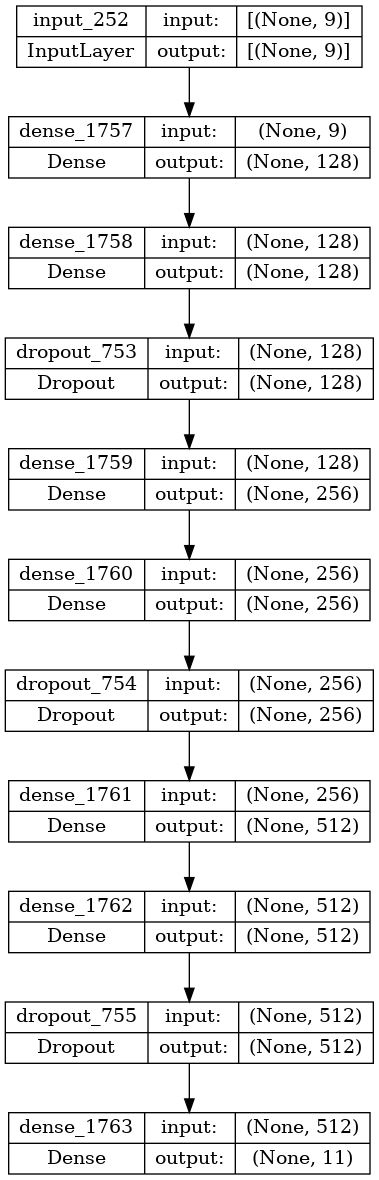

In [10]:
#DNN representation
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
tensorboard_callback.set_model(NN)
keras.utils.plot_model(NN, to_file='Model representation/NN.png', show_shapes=True)

In [11]:
visualkeras.layered_view(NN)

## Model test

In [12]:
#Test on the test set
Y_test_predict = NN.predict(X_test)
Y_test_predict_proba = np.argmax(Y_test_predict,axis=1)
Y_test = pd.concat([Y_test], ignore_index=True)

print("Accuracy on test dataset", accuracy_score(Y_test, Y_test_predict_proba))

57/57 [==============================] - 0s 4ms/step
Accuracy on test dataset 0.5354155047406581


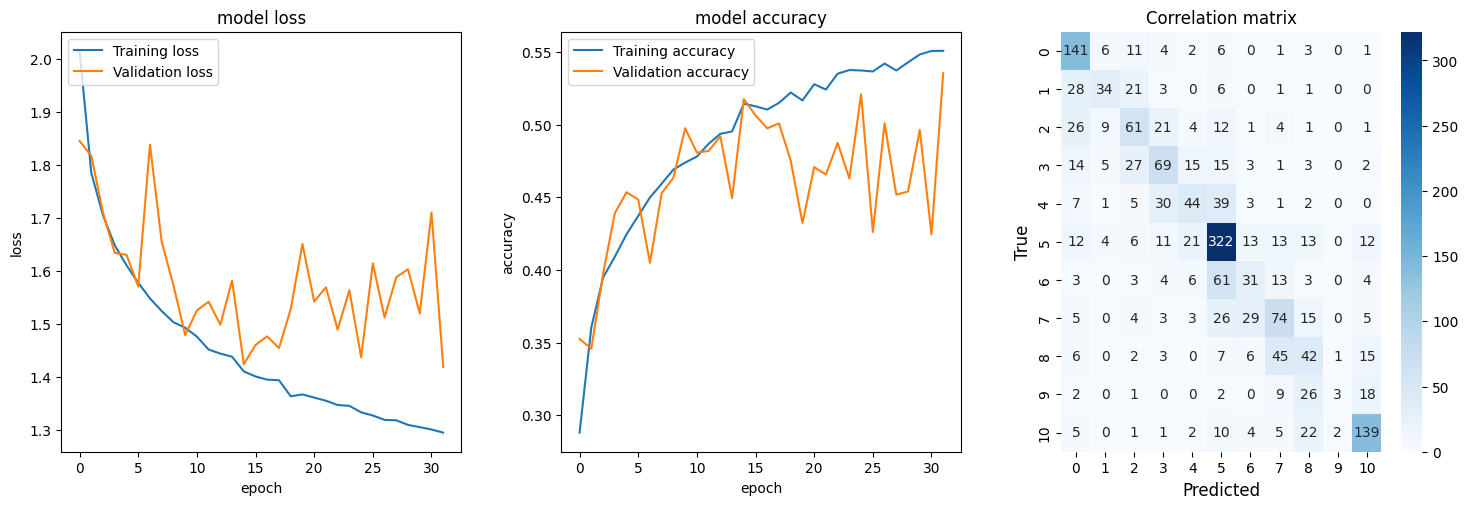

In [13]:
#confusion matrix & curves
conf = confusion_matrix(Y_test,Y_test_predict_proba)
plot_curves_confusion (history,conf,range(11))

In [14]:
#classification report 
classification_report_opti(Y_test, Y_test_predict_proba)
print(classification_report(Y_test, Y_test_predict_proba, output_dict=False, target_names=[str(i) for i in range(11)]))

0 :  {'TN': 1457, 'FN': 28, 'FP': 161, 'TP': 147}
1 :  {'TN': 1332, 'FN': 11, 'FP': 367, 'TP': 83}
2 :  {'TN': 1394, 'FN': 49, 'FP': 259, 'TP': 91}
3 :  {'TN': 1362, 'FN': 43, 'FP': 277, 'TP': 111}
4 :  {'TN': 1022, 'FN': 19, 'FP': 639, 'TP': 113}
5 :  {'TN': 1029, 'FN': 71, 'FP': 337, 'TP': 356}
6 :  {'TN': 1007, 'FN': 23, 'FP': 658, 'TP': 105}
7 :  {'TN': 1359, 'FN': 46, 'FP': 270, 'TP': 118}
8 :  {'TN': 1450, 'FN': 39, 'FP': 216, 'TP': 88}
9 :  {'TN': 1445, 'FN': 14, 'FP': 287, 'TP': 47}
10 :  {'TN': 1540, 'FN': 50, 'FP': 62, 'TP': 141}
class | precision | recall | f1-score | accuracy
0     |  0.477     |  0.84  |  0.608    |  0.895
1     |  0.184     |  0.883  |  0.305    |  0.789
2     |  0.26     |  0.65  |  0.371    |  0.828
3     |  0.286     |  0.721  |  0.41    |  0.822
4     |  0.15     |  0.856  |  0.255    |  0.633
5     |  0.514     |  0.834  |  0.636    |  0.772
6     |  0.138     |  0.82  |  0.236    |  0.62
7     |  0.304     |  0.72  |  0.427    |  0.824
8     |  0.28

In [17]:
# changed x to x_train
explainer = LimeTabularExplainer(X_test.values[:, :], feature_names=feature_names, discretize_continuous=True, class_names=range(11), mode='classification')
# added top_labels=1
exp = explainer.explain_instance(X_test.iloc[0, :], NN.predict, num_features=len(feature_names), top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)

157/157 [==============================] - 0s 1ms/step


# Average accuracy on 10 train/test dataset different

  0%|          | 0/10 [00:00<?, ?it/s] Modèle n°1 : STARTED 

5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                          

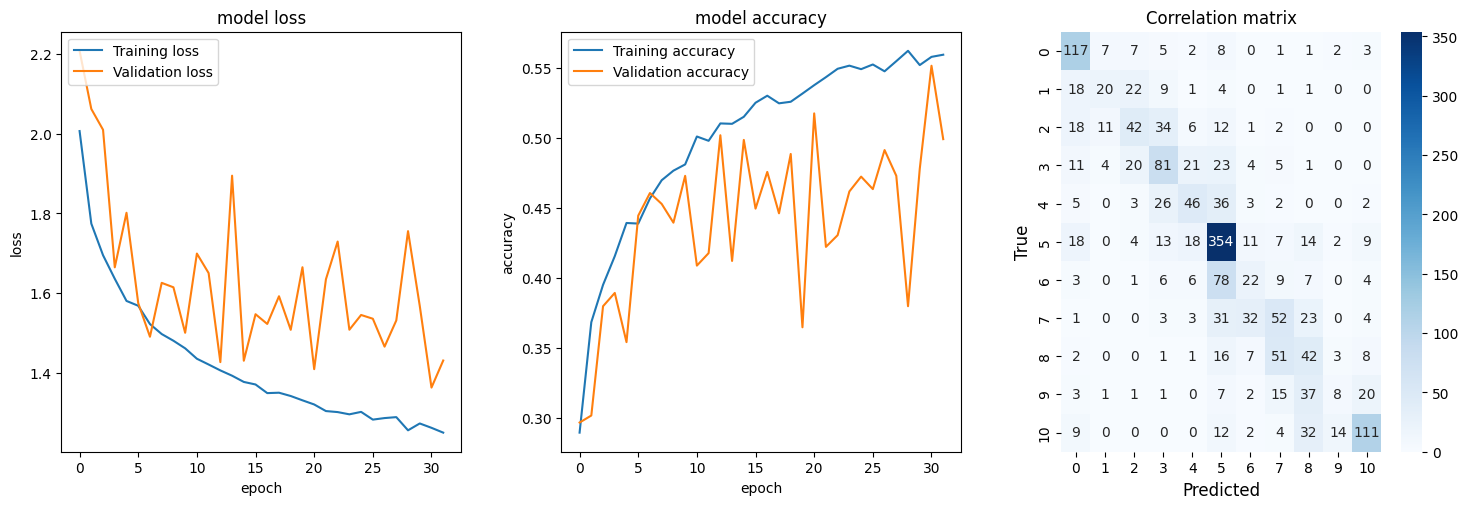

 10%|█         | 1/10 [02:29<22:23, 149.32s/it]0 :  {'TN': 1516, 'FN': 29, 'FP': 124, 'TP': 124}
1 :  {'TN': 1429, 'FN': 16, 'FP': 288, 'TP': 60}
2 :  {'TN': 1432, 'FN': 39, 'FP': 235, 'TP': 87}
3 :  {'TN': 1362, 'FN': 48, 'FP': 261, 'TP': 122}
4 :  {'TN': 914, 'FN': 15, 'FP': 756, 'TP': 108}
5 :  {'TN': 957, 'FN': 67, 'FP': 386, 'TP': 383}
6 :  {'TN': 952, 'FN': 27, 'FP': 705, 'TP': 109}
7 :  {'TN': 1360, 'FN': 42, 'FP': 284, 'TP': 107}
8 :  {'TN': 1422, 'FN': 35, 'FP': 240, 'TP': 96}
9 :  {'TN': 1415, 'FN': 30, 'FP': 283, 'TP': 65}
10 :  {'TN': 1544, 'FN': 59, 'FP': 65, 'TP': 125}
class | precision | recall | f1-score | accuracy
0     |  0.5     |  0.81  |  0.618    |  0.915
1     |  0.172     |  0.789  |  0.282    |  0.83
2     |  0.27     |  0.69  |  0.388    |  0.847
3     |  0.319     |  0.718  |  0.442    |  0.828
4     |  0.125     |  0.878  |  0.219    |  0.57
5     |  0.498     |  0.851  |  0.628    |  0.747
6     |  0.134     |  0.801  |  0.23    |  0.592
7     |  0.274     

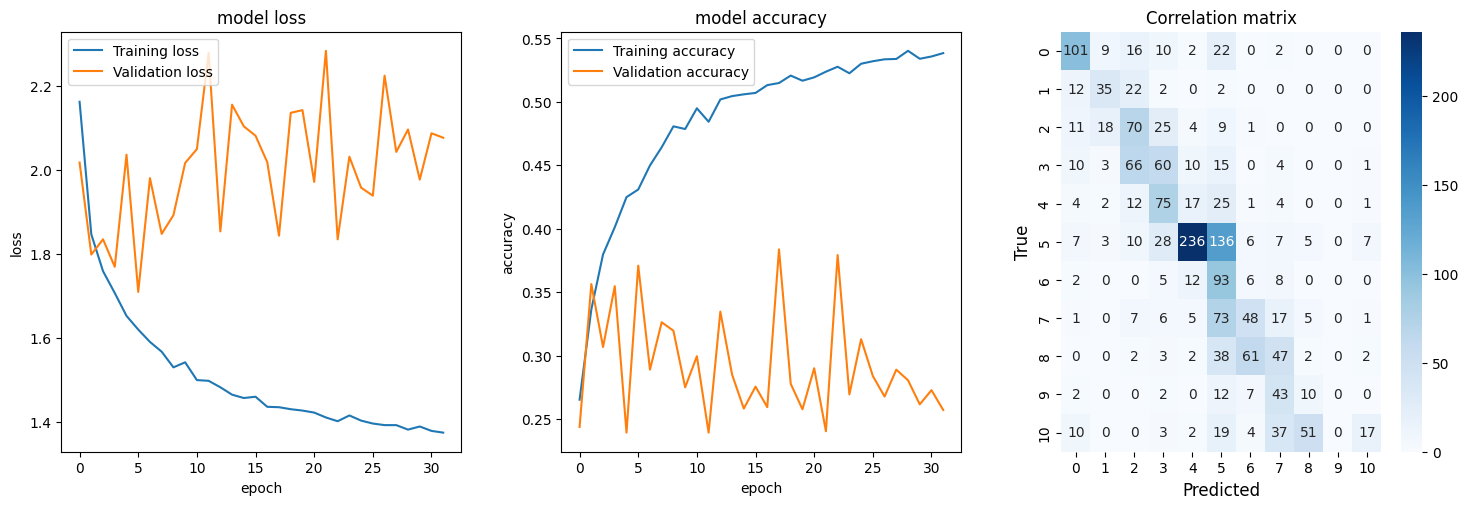

/root/work/library.py:413: RuntimeWarning: invalid value encountered in long_scalars
  pre = (TP) / (TP + FP)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

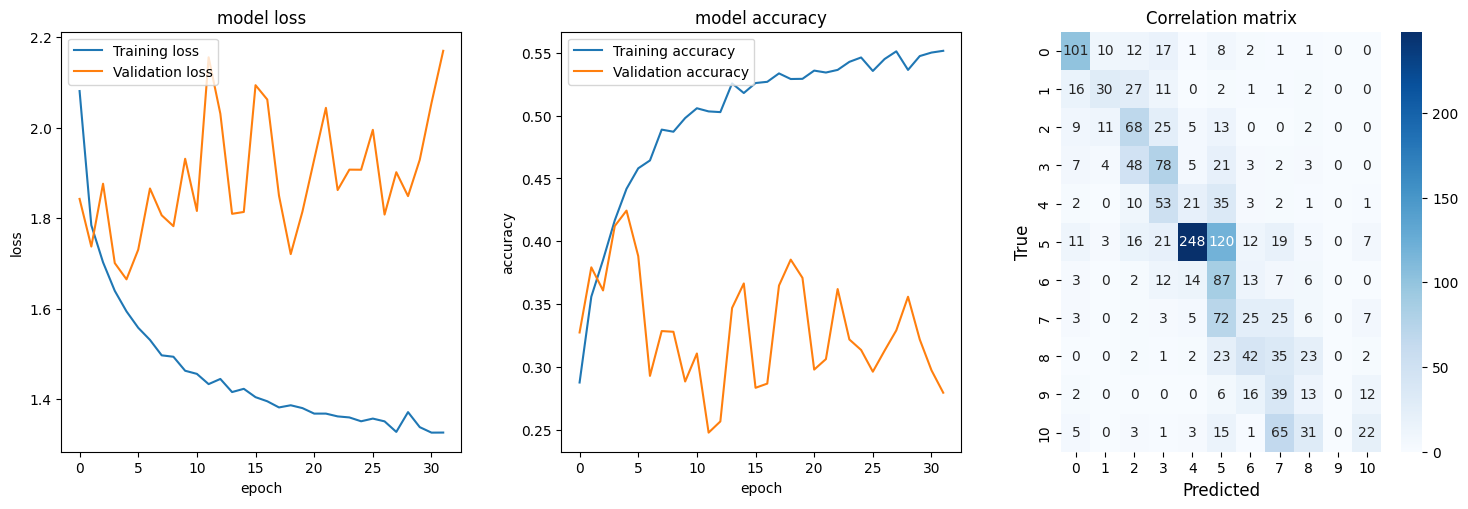

/root/work/library.py:413: RuntimeWarning: invalid value encountered in long_scalars
  pre = (TP) / (TP + FP)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

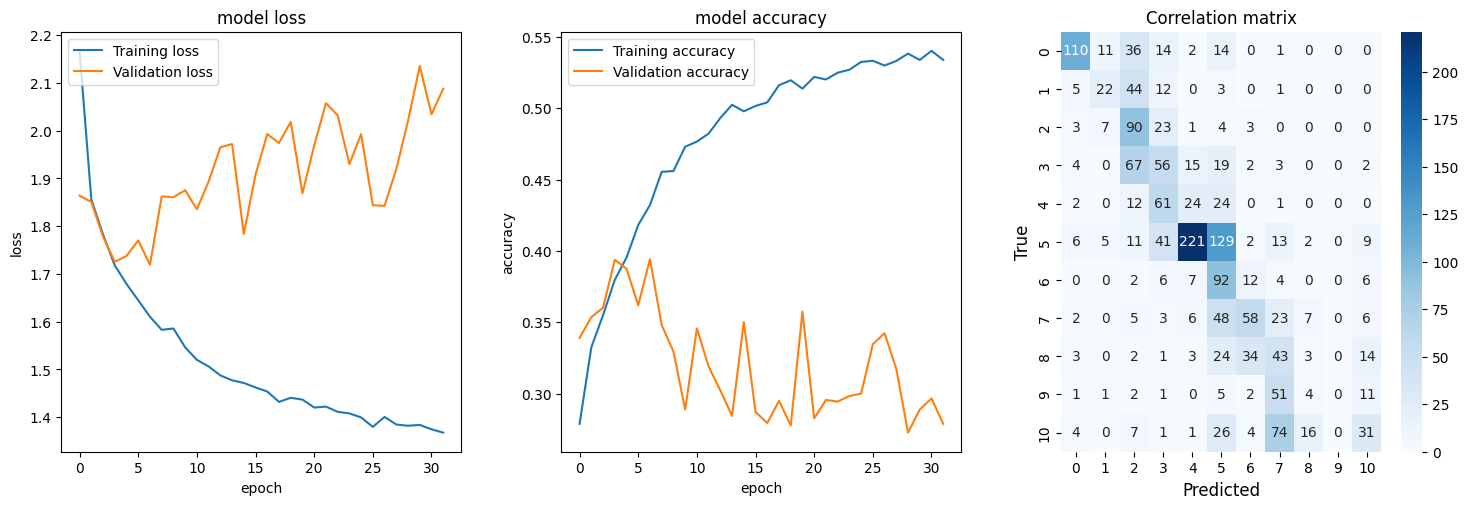

/root/work/library.py:413: RuntimeWarning: invalid value encountered in long_scalars
  pre = (TP) / (TP + FP)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

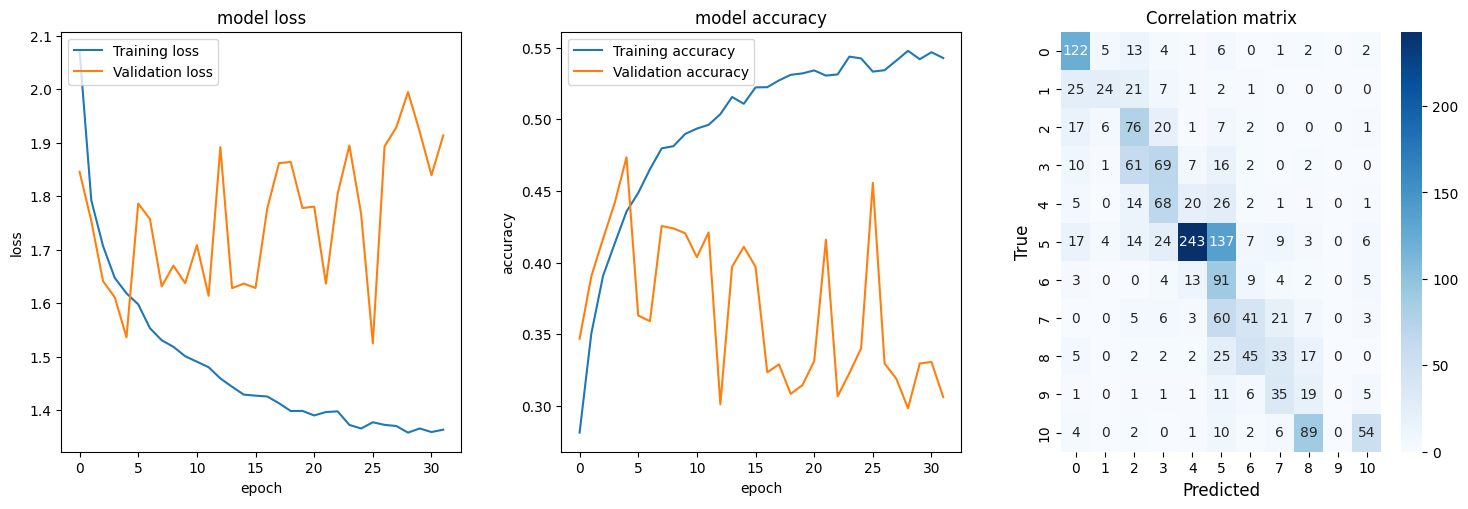

/root/work/library.py:413: RuntimeWarning: invalid value encountered in long_scalars
  pre = (TP) / (TP + FP)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

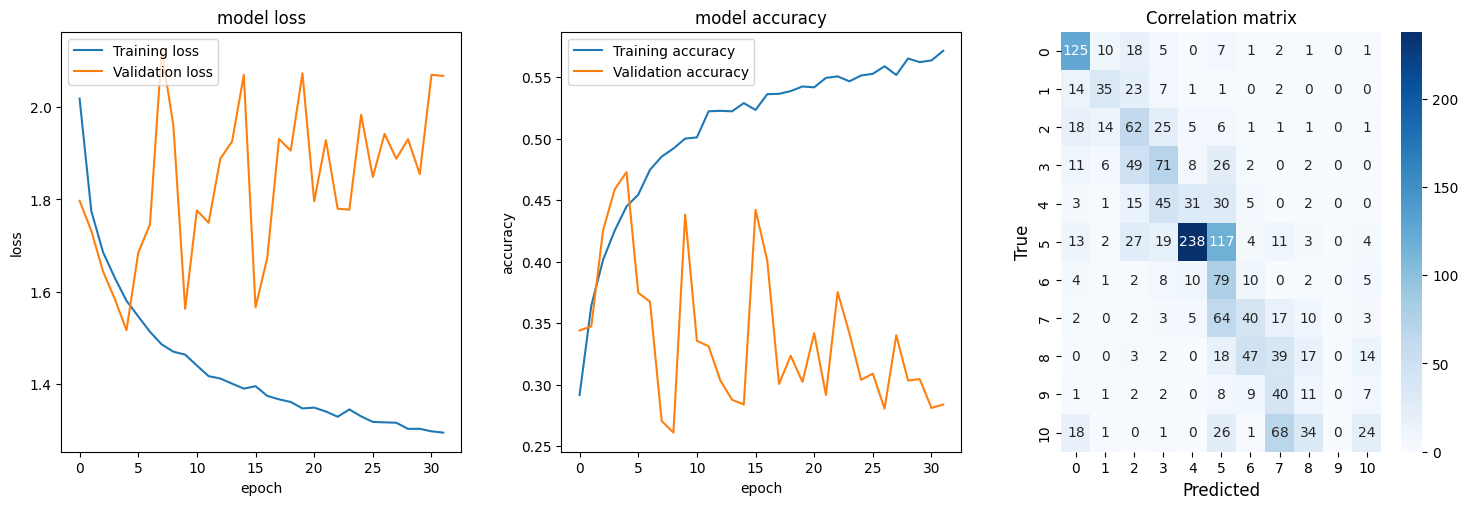

/root/work/library.py:413: RuntimeWarning: invalid value encountered in long_scalars
  pre = (TP) / (TP + FP)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

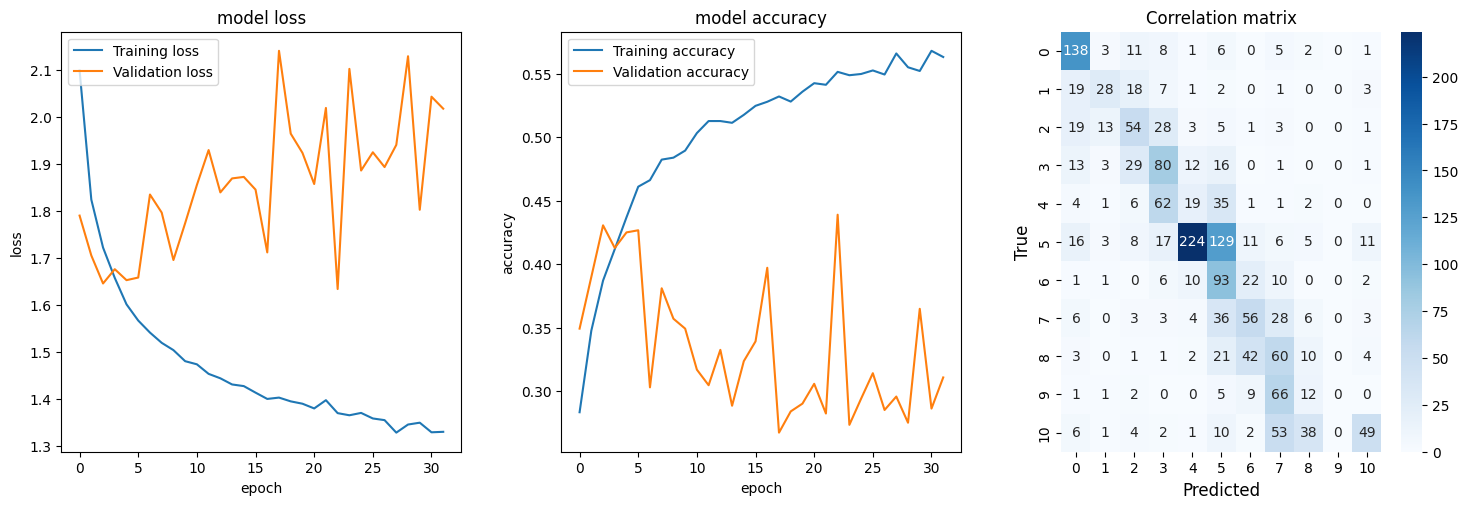

/root/work/library.py:413: RuntimeWarning: invalid value encountered in long_scalars
  pre = (TP) / (TP + FP)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

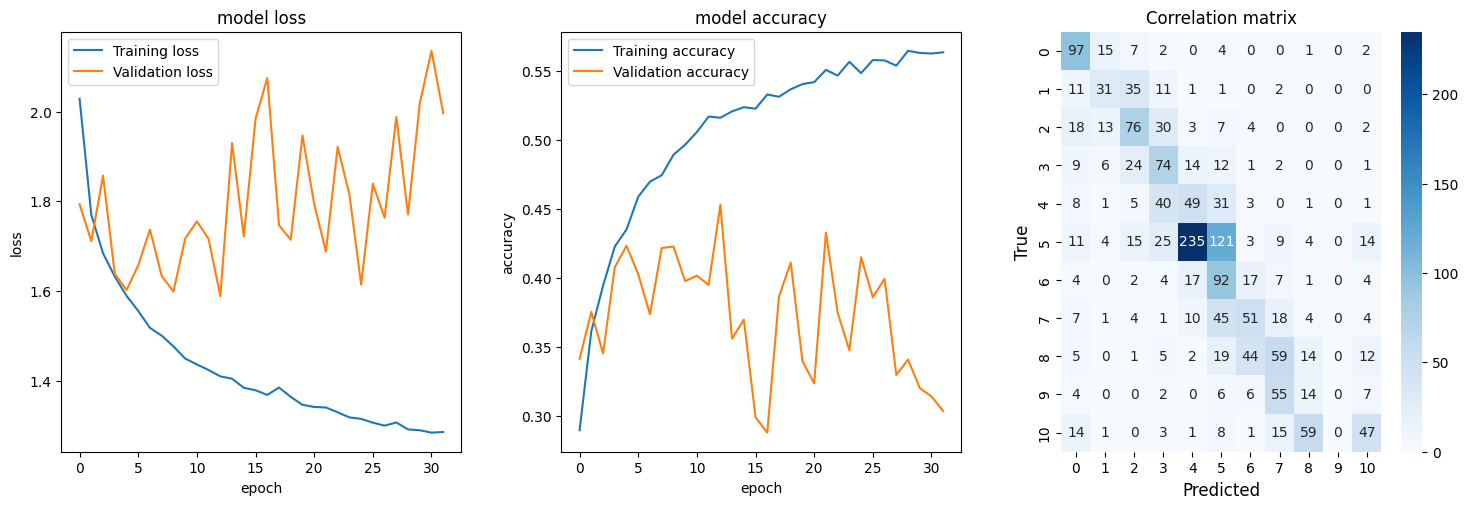

/root/work/library.py:413: RuntimeWarning: invalid value encountered in long_scalars
  pre = (TP) / (TP + FP)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

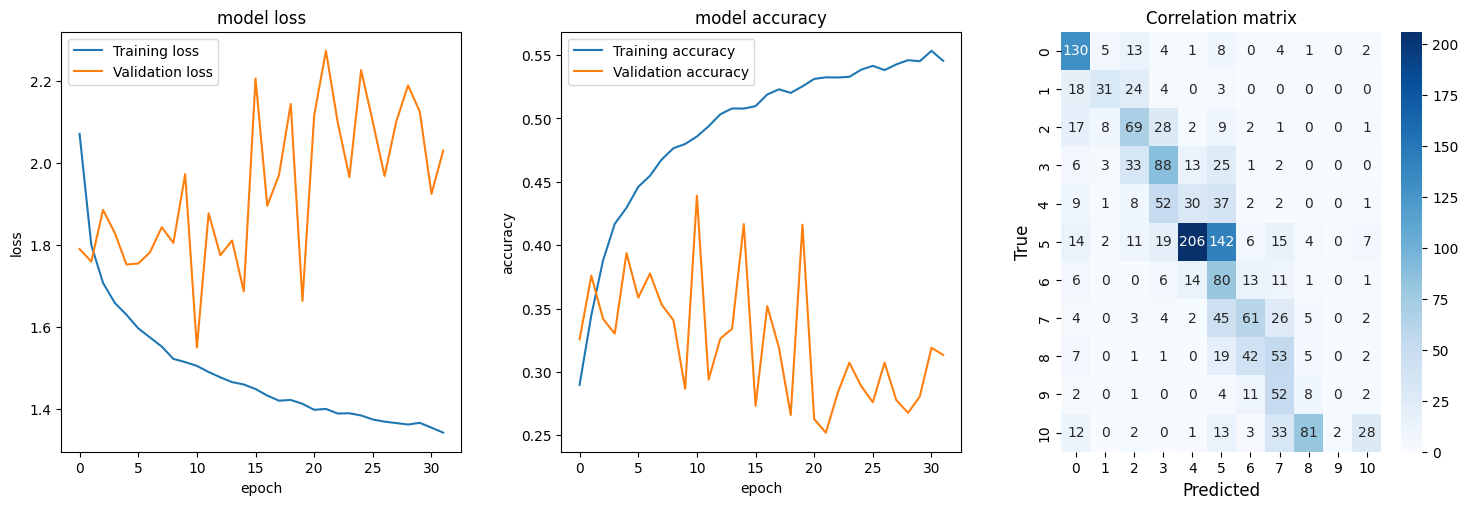

 90%|█████████ | 9/10 [21:52<02:25, 145.70s/it]0 :  {'TN': 1485, 'FN': 33, 'FP': 140, 'TP': 135}
1 :  {'TN': 1346, 'FN': 7, 'FP': 367, 'TP': 73}
2 :  {'TN': 1340, 'FN': 32, 'FP': 316, 'TP': 105}
3 :  {'TN': 1116, 'FN': 37, 'FP': 506, 'TP': 134}
4 :  {'TN': 910, 'FN': 23, 'FP': 741, 'TP': 119}
5 :  {'TN': 926, 'FN': 72, 'FP': 441, 'TP': 354}
6 :  {'TN': 1040, 'FN': 28, 'FP': 621, 'TP': 104}
7 :  {'TN': 1288, 'FN': 60, 'FP': 353, 'TP': 92}
8 :  {'TN': 1415, 'FN': 72, 'FP': 248, 'TP': 58}
9 :  {'TN': 1570, 'FN': 70, 'FP': 143, 'TP': 10}
10 :  {'TN': 1600, 'FN': 145, 'FP': 18, 'TP': 30}
class | precision | recall | f1-score | accuracy
0     |  0.491     |  0.804  |  0.61    |  0.904
1     |  0.166     |  0.912  |  0.281    |  0.791
2     |  0.249     |  0.766  |  0.376    |  0.806
3     |  0.209     |  0.784  |  0.33    |  0.697
4     |  0.138     |  0.838  |  0.237    |  0.574
5     |  0.445     |  0.831  |  0.58    |  0.714
6     |  0.143     |  0.788  |  0.242    |  0.638
7     |  0.207

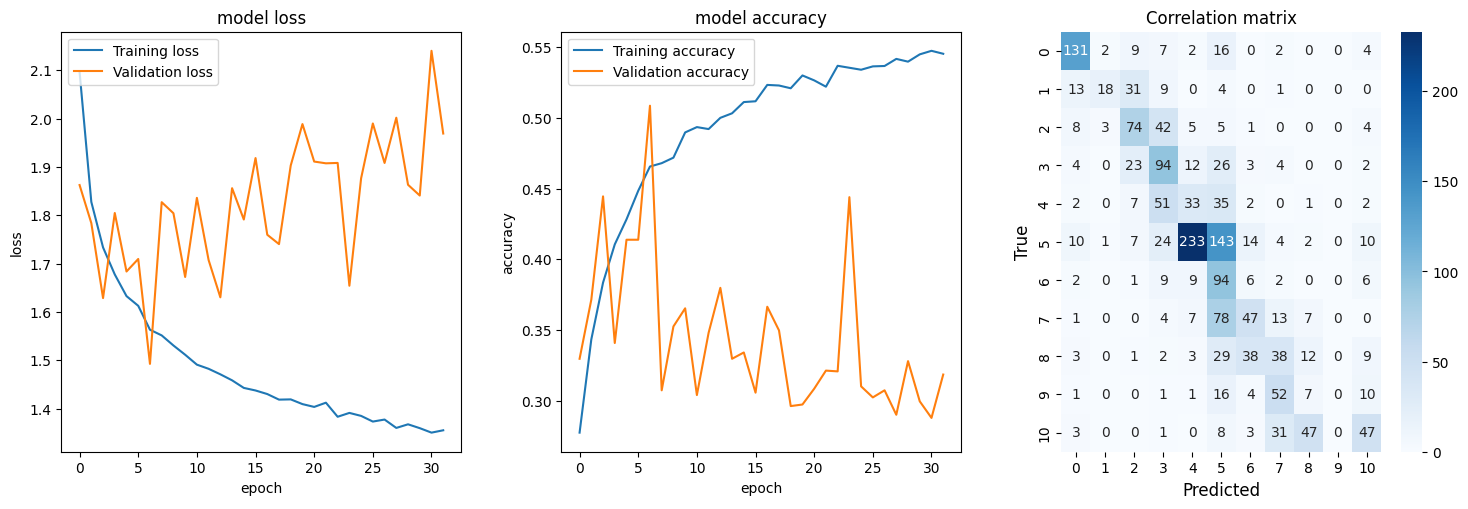

/root/work/library.py:413: RuntimeWarning: invalid value encountered in long_scalars
  pre = (TP) / (TP + FP)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

In [15]:
print(NN)
column = ['0 acc_0','0 acc_1','1 acc_0','1 acc_1','2 acc_0','2 acc_1','3 acc_0','3 acc_1','4 acc_0','4 acc_1','5 acc_0','5 acc_1','6 acc_0','6 acc_1','7 acc_0','7 acc_1','8 acc_0','8 acc_1','9 acc_0','9 acc_1','10 acc_0','10 acc_1']
class_accuracy = pd.DataFrame(columns=column)
for i in tqdm(range(10)):
    print(" Modèle n°"+str(i+1)+" : STARTED \n")
    rand_int = random.randint(2, 1000)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=rand_int)
    print(rand_int)
    
    #model train
    NN_test = create_model(NN.optimizer, )
    epochs = len(history['loss'])
    batch_size = NN.layers[0].input_shape[0]
    history_test = NN_test.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size) 

    #model test
    Y_test_predict = NN_test.predict(X_test)
    Y_test_predict_proba = np.argmax(Y_test_predict,axis=1)
    Y_test = pd.concat([Y_test], ignore_index=True)

    print("Accuracy on test dataset", accuracy_score(Y_test, Y_test_predict_proba))

    conf = confusion_matrix(Y_test,Y_test_predict_proba)
    plot_curves_confusion (history_test.history,conf,range(11))

    #classification
    acc_1 = classification_report_opti(Y_test, Y_test_predict_proba)
    acc_0, prec_0 = accuracy_inclasses(Y_test, Y_test_predict_proba)
    print(classification_report(Y_test, Y_test_predict_proba, output_dict=False, target_names=[str(i) for i in range(11)]))

    for j in range(11):
        class_accuracy.at[i, str(j) + " acc_0"] = acc_0[j]
        class_accuracy.at[i, str(j) + " acc_1"] = acc_1[j]
    print("\n")
    print(" Modèle n°"+str(i+1)+" : FINISHED \n")


In [16]:
round(class_accuracy.mean() * 100, 1)

0 acc_0     93.4
0 acc_1     91.3
1 acc_0     95.6
1 acc_1     79.5
2 acc_0     90.0
2 acc_1     79.6
3 acc_0     87.5
3 acc_1     68.0
4 acc_0     80.5
4 acc_1     55.2
5 acc_0     69.2
5 acc_1     71.4
6 acc_0     87.2
6 acc_1     64.8
7 acc_0     84.4
7 acc_1     78.4
8 acc_0     88.7
8 acc_1     83.8
9 acc_0     95.1
9 acc_1     88.0
10 acc_0    91.6
10 acc_1    91.6
dtype: float64

In [3]:
models_df = pd.DataFrame({'basic':[ 45, 28, 34, 33, 35, 29, 28, 36, 32, 36],
        'opti': [ 78.5, 77.0, 78.3, 77.6, 78.0, 77.2, 77.3, 77.8, 78.2, 77.9] } )
print("basIc: ",models_df.basic.mean(),"\nopti: ",models_df.opti.mean())

basIc:  33.6 
opti:  77.78


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df420847-9b7d-4085-bb2b-2d13083511fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>